In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

# import seaborn: very important to easily plot histograms and density estimations
import seaborn as sns
sns.set(color_codes=True)

from scipy import stats
from scipy.stats import norm
# generate random numbersfrom N(0,1)

##<font color='navy' size=8pt> Classification Algorithms</font>

### <font color='red'> Critical Thinking: What is *classification*?</font> What is the difference between <font color='deepskyblue'>*regression*</font> and <font color='forestgreen'>*classification*?</font>

**Regression**: the dependent variable is continuous and we want to predict the expected value given the input features.

**Classification**: the dependent variable is binary or nominal and we want to predict the corect class given the input features.

If we had one input feature as a continuous variable we could ***see*** the classification.

<font color='magenta'>**Example**</font> Let's imagine we have data for the weights of two different animals and we would like to know whether the *weight* alone may be a good predictor for what type of animal there is.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1Ydr5-3uQU7HVDv7aqLQY7V7yPfUun8Wr' 
width='650px' height='550px' />
<figcaption>Weight distributions for squirrels and rabbits</figcaption></center>
</figure>


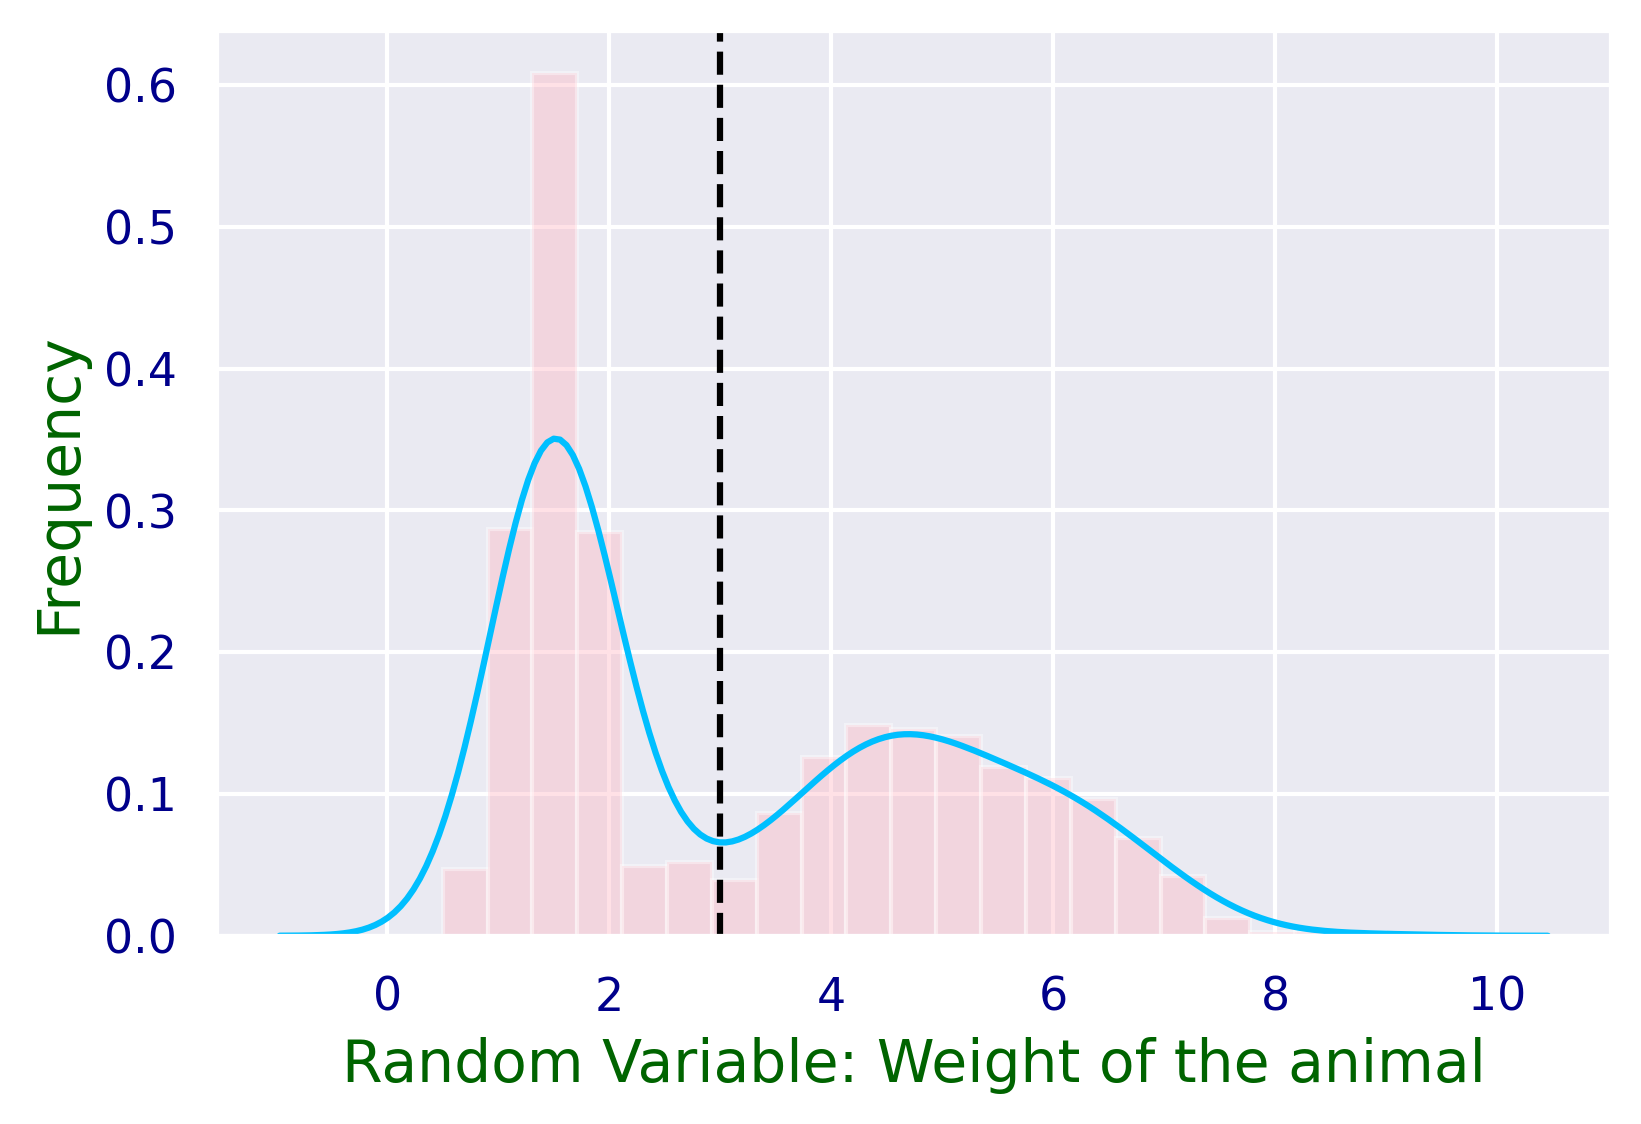

In [5]:
plt.figure()
data_weights = np.concatenate([norm.rvs(size=500,loc=1.5,scale=0.3),norm.rvs(size=500,loc=5,scale=1.25)],axis=0)
data_weights = np.round(data_weights,2)
animal = np.repeat([0,1],500)
# then we want to display the histogram and the fit of the underlying distribution:
ax1 = sns.distplot(data_weights,
                  bins=21,
                  kde=True,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  #fit=stats.norm,
                  #fit_kws={"color":'deepskyblue'}
                   )
ax1.set_xlabel('Random Variable: Weight of the animal',fontsize=14,color='darkgreen')
ax1.set_ylabel('Frequency',fontsize=14,color='darkgreen')
l1 = ax1.lines[0]
plt.axvline(x=3.0, color='black',linestyle='dashed')

x = l1.get_xydata()[:,0]
y = l1.get_xydata()[:,1]
plt.tick_params(axis='x', colors='darkblue')
plt.tick_params(axis='y', colors='darkblue')
#ax1.fill_between(x,y, where = x <= 3.0, color='palegreen',alpha=0.5)

##<font color='navy'> Logistic Regression </font>
 
 
What we want: classify by using a probability model (an estimate of the odds-ratio) such as a **straight** line or a **sigmoid** curve.


IMPORTANT: If we divide two probability values we get an output between 0 and $\infty$ (the infinity is approached when the denominator is very close to 0 and the numerator is very close to 1.

The ***odds-ratio*** is


$$\large
\frac{\mathbb{P}(y_i=1|\text{feature data})}{\mathbb{P}(y_i=0|\text{feature data})}
$$

Classification by a straight line is possible but less desirable (as you can see in the picture.)

The concept of the logistic regression in a multivariate setup is to model the log of the odds ratio as a linear function of the features:

$$\large
\log\left(\frac{\mathbb{P}(y_i=1|\text{feature data})}{\mathbb{P}(y_i=0|\text{feature data})} \right) = \beta_0 + \sum\limits_{i=1}^{p} \beta_jx_{ij}
$$

where $y_i$ represents the $i-th$ output (classification) and $x_{ij}$ represent the features of the $i-th$ observation.

Fact:
$$\large
\mathbb{P}(y_i=\text{rabbit}|\text{weight}) + \mathbb{P}(y_i=\text{squirrel}|\text{weight}) = 1
$$

We get 

$$\large
\mathbb{P}(y_i=\text{rabbit}|\text{weight}) = \frac{1}{1+e^{-\beta_0-\beta x_i}}
$$

<figure>
<center>
<img src='https://drive.google.com/uc?id=14lFmIPhJwzsefkYeCJaV_yPitZsCn9GB' 
width='600px' />
<figcaption>Different types of Odds Ratio estimates</figcaption></center>
</figure>



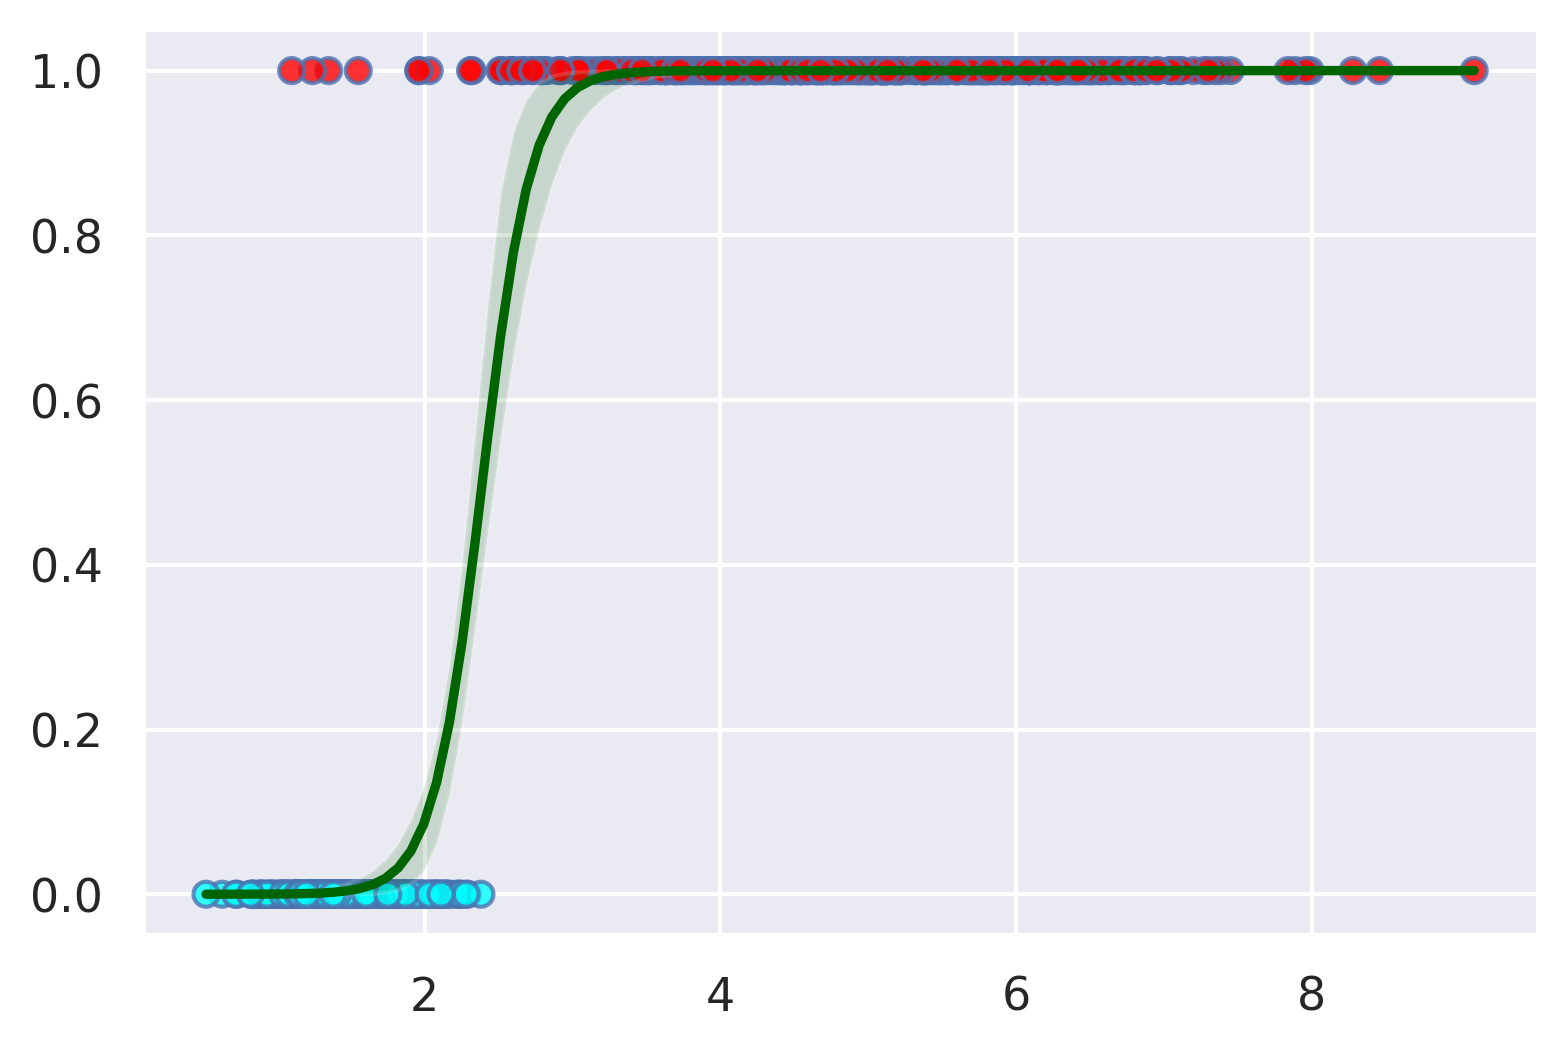

In [ ]:
np.seterr(divide='ignore', invalid='ignore')

sns.regplot(data_weights, animal, logistic=True,line_kws={'color': 'darkgreen'},scatter_kws={'facecolors':np.where( animal==0 , 'cyan', 'red')})
plt.show()

##<font color='navy'> Example with 2 input features </font>

The separation of the classes can be visualized in 2D.

In [6]:
import numpy as np
import pandas as pd

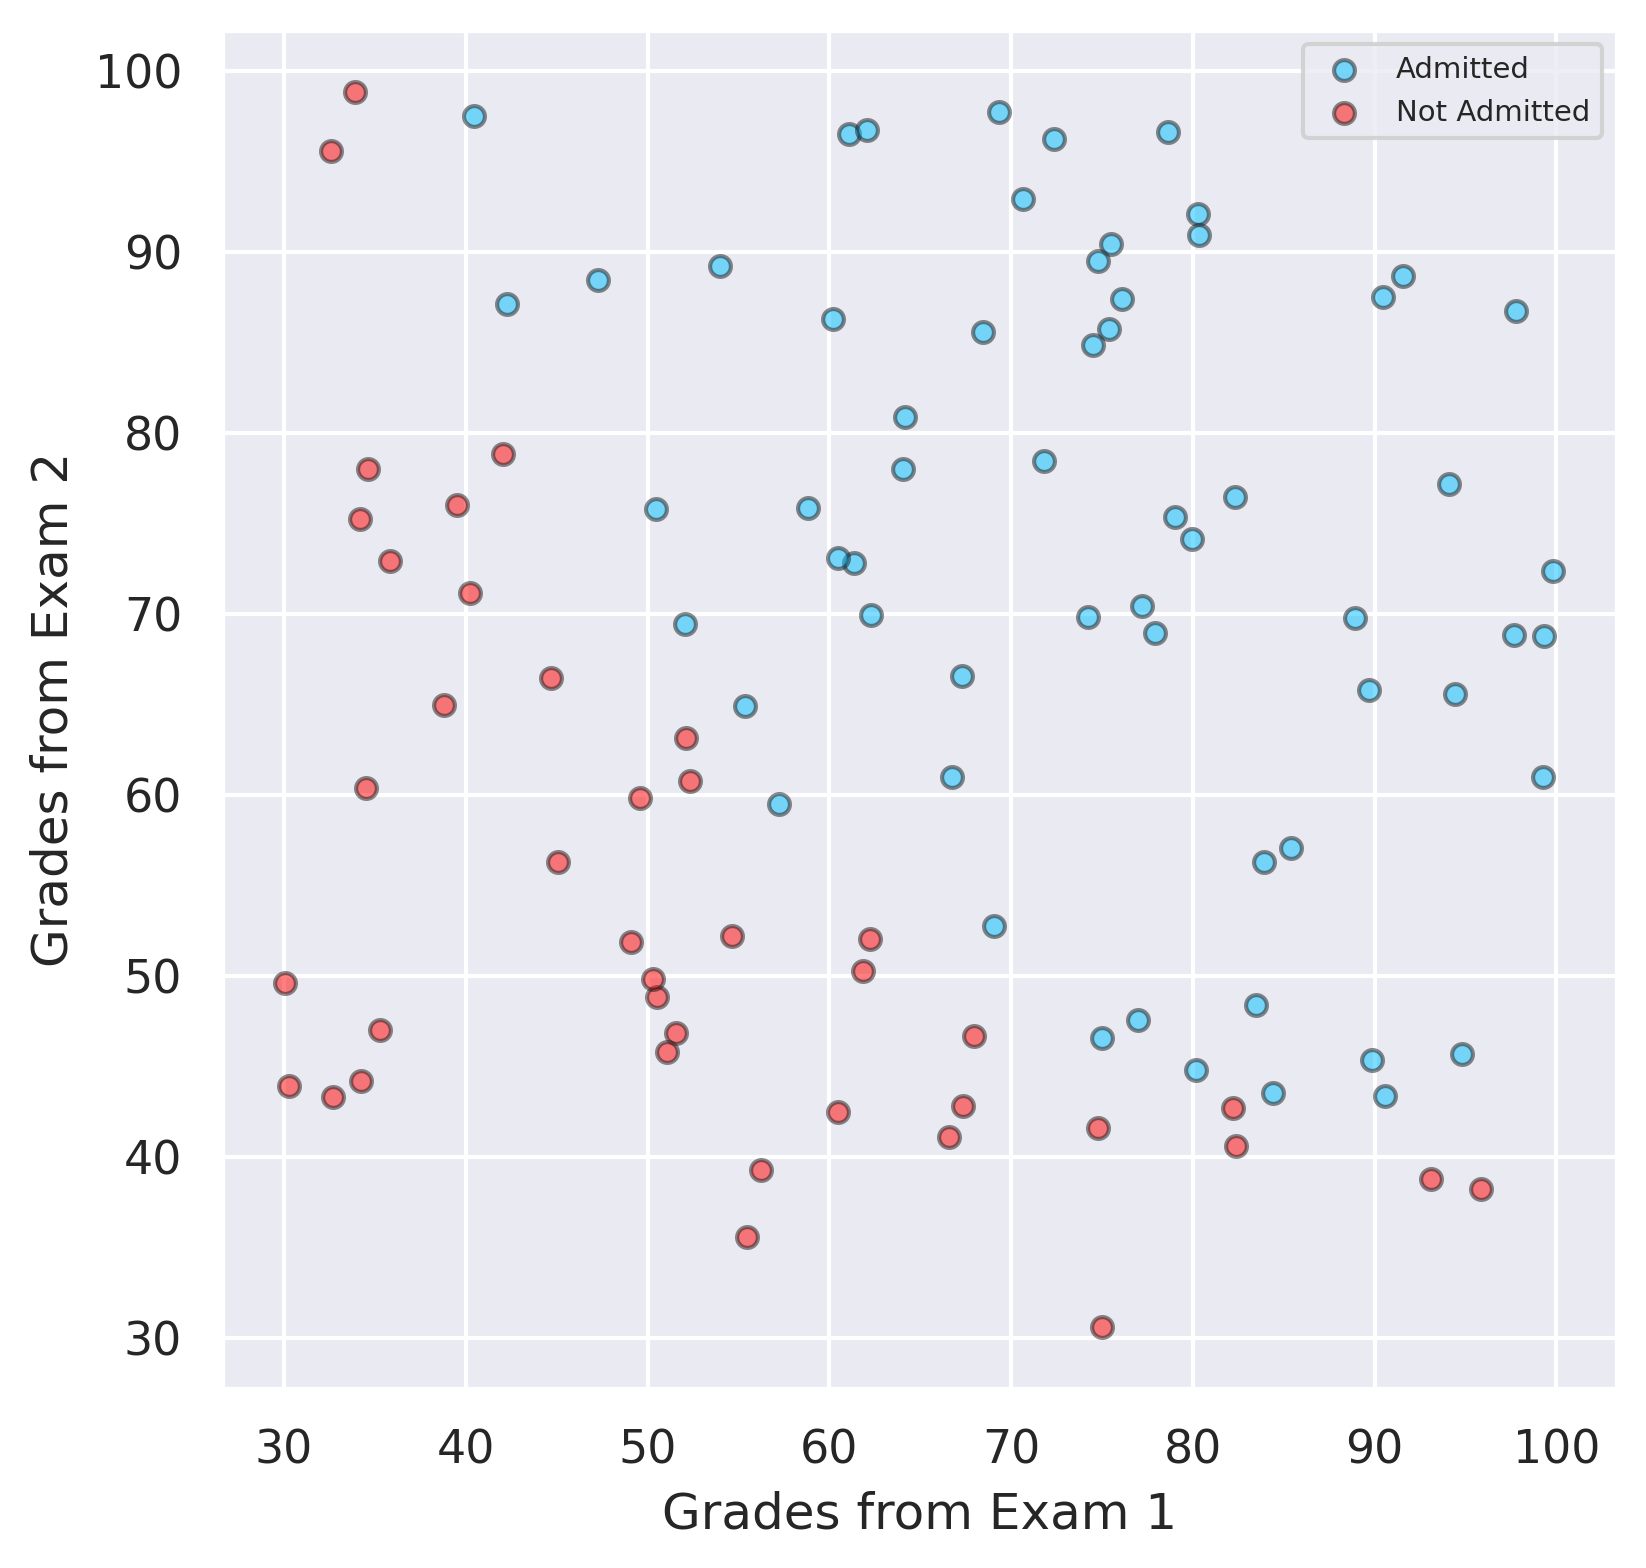

In [29]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, confusion_matrix as CM


# function definitions
def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df

# load the data from the file
data = load_data("drive/MyDrive/Data Sets/example_data_classification.csv", None)

# X = feature values, all the columns except the last column
x = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

# filter out the applicants that got admitted
admitted = data.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]

# plots
plt.figure(figsize=(6,6))
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1],color ='deepskyblue', s=25, label='Admitted',ec='k',alpha=0.5)
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1],color='red', s=25, ec='k',alpha=0.5,label='Not Admitted')
plt.xlabel("Grades from Exam 1")
plt.ylabel("Grades from Exam 2")
plt.legend(fontsize=7)
plt.show()

The decision boundary is

$$\large c_1\cdot E_1 + c_2\cdot E_2 + c_0 = 0 $$

In [8]:
model = LogisticRegression(solver='lbfgs')
model.fit(x, y)
predicted_classes = model.predict(x)
accuracy = accuracy_score(y,predicted_classes)
print(model.coef_)
print(model.intercept_)
print(accuracy)

[[0.20535491 0.2005838 ]]
[-25.05219314]
0.89


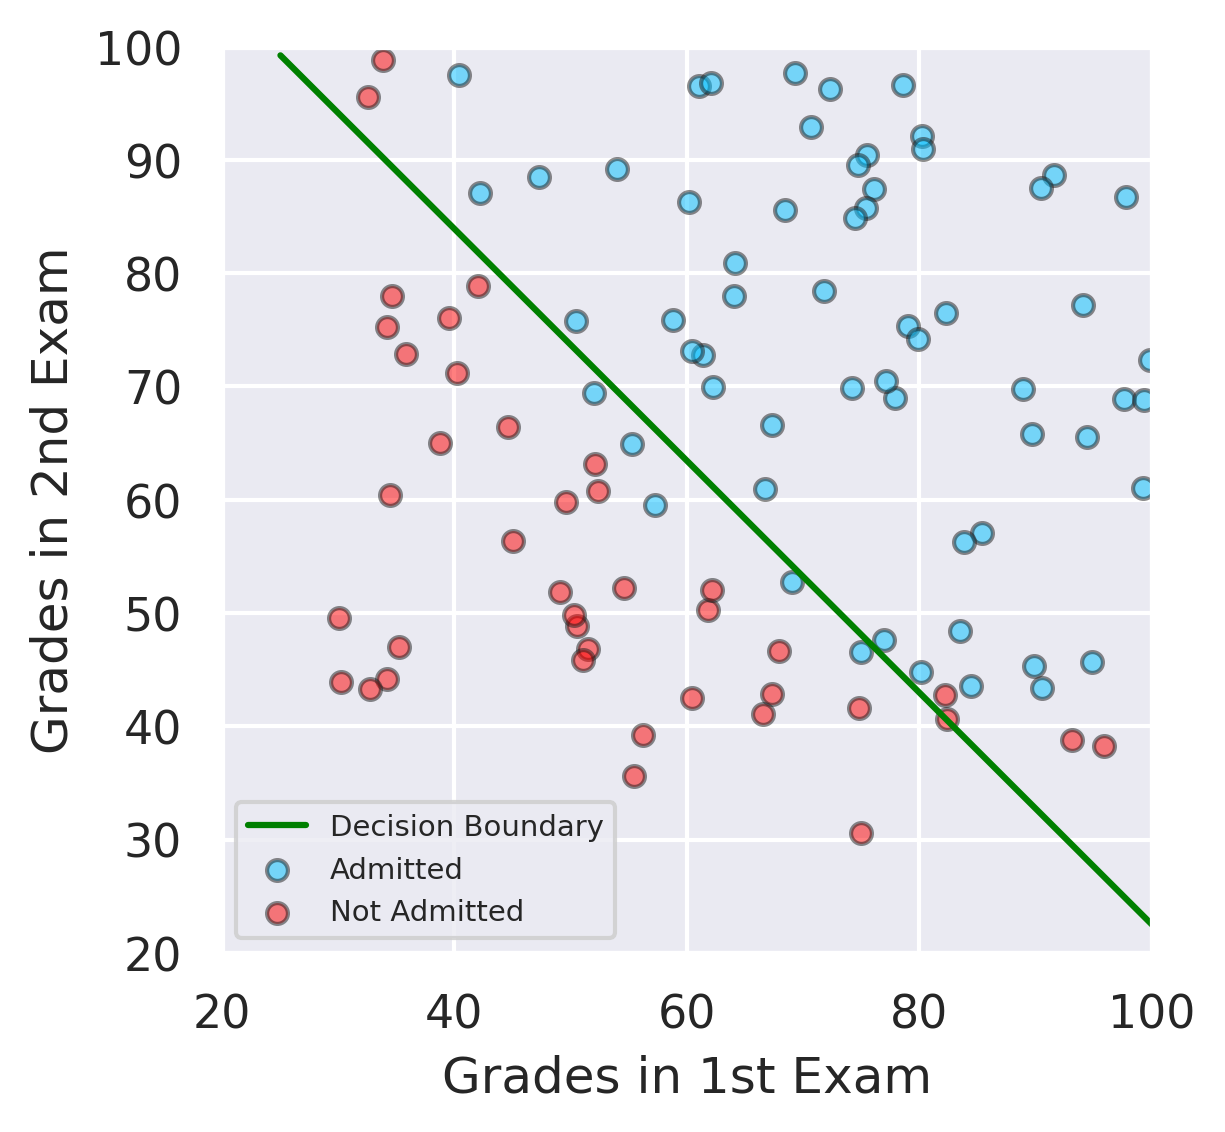

In [30]:
# E1_values mean grades from Exam 1 and E2_values mean grades from Exam 2
E1_values = [np.min(x.values[:, 0] - 5), np.max(x.values[:, 0] + 5)]
E2_values = - (model.intercept_ + model.coef_[:,0]*E1_values) / model.coef_[:,1] # the decision boundary equation

# plots
plt.figure(figsize=(4,4))
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1],color ='deepskyblue', s=25, label='Admitted',ec='k',alpha=0.5)
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1],color='red', s=25, ec='k',alpha=0.5,label='Not Admitted')
plt.plot(E1_values, E2_values, label='Decision Boundary',color='green')
plt.xlim(20,100)
plt.ylim(20,100)
plt.xlabel('Grades in 1st Exam')
plt.ylabel('Grades in 2nd Exam')
plt.legend(fontsize=7)
plt.show()

In [11]:
# We want to predict for a new student the probability of admission:
p = model.predict_proba([[70,70]]) # this student was admitted


In [12]:
p

array([[0.03345531, 0.96654469]])

In [13]:
# The probability that the student was not admitted
print('The probability that the student was not admitted (according to logistic regression) is : ' +str(100*p[:,0][0]) + '%')

The probability that the student was not admitted (according to logistic regression) is : 3.3455311017537515%


In [ ]:
# The probability the student was admitted
p[:,1]

array([0.44209148])

In [ ]:
sum(p[0,:])

1.0

##K-Nearest Neighbors Algorithm
###<font color='red'> Big Idea: The proximity is very important.</font>

<font color='blue'> The classification is decided by the votes of the $k$-nearest neighbors; if $k$ is an odd natural number such as $2p+1$ then we know the vote is not a tie. 

<font color='forestgreen'> The votes can be weighted (if we want) by the inverse of the Euclidean distance.</font>



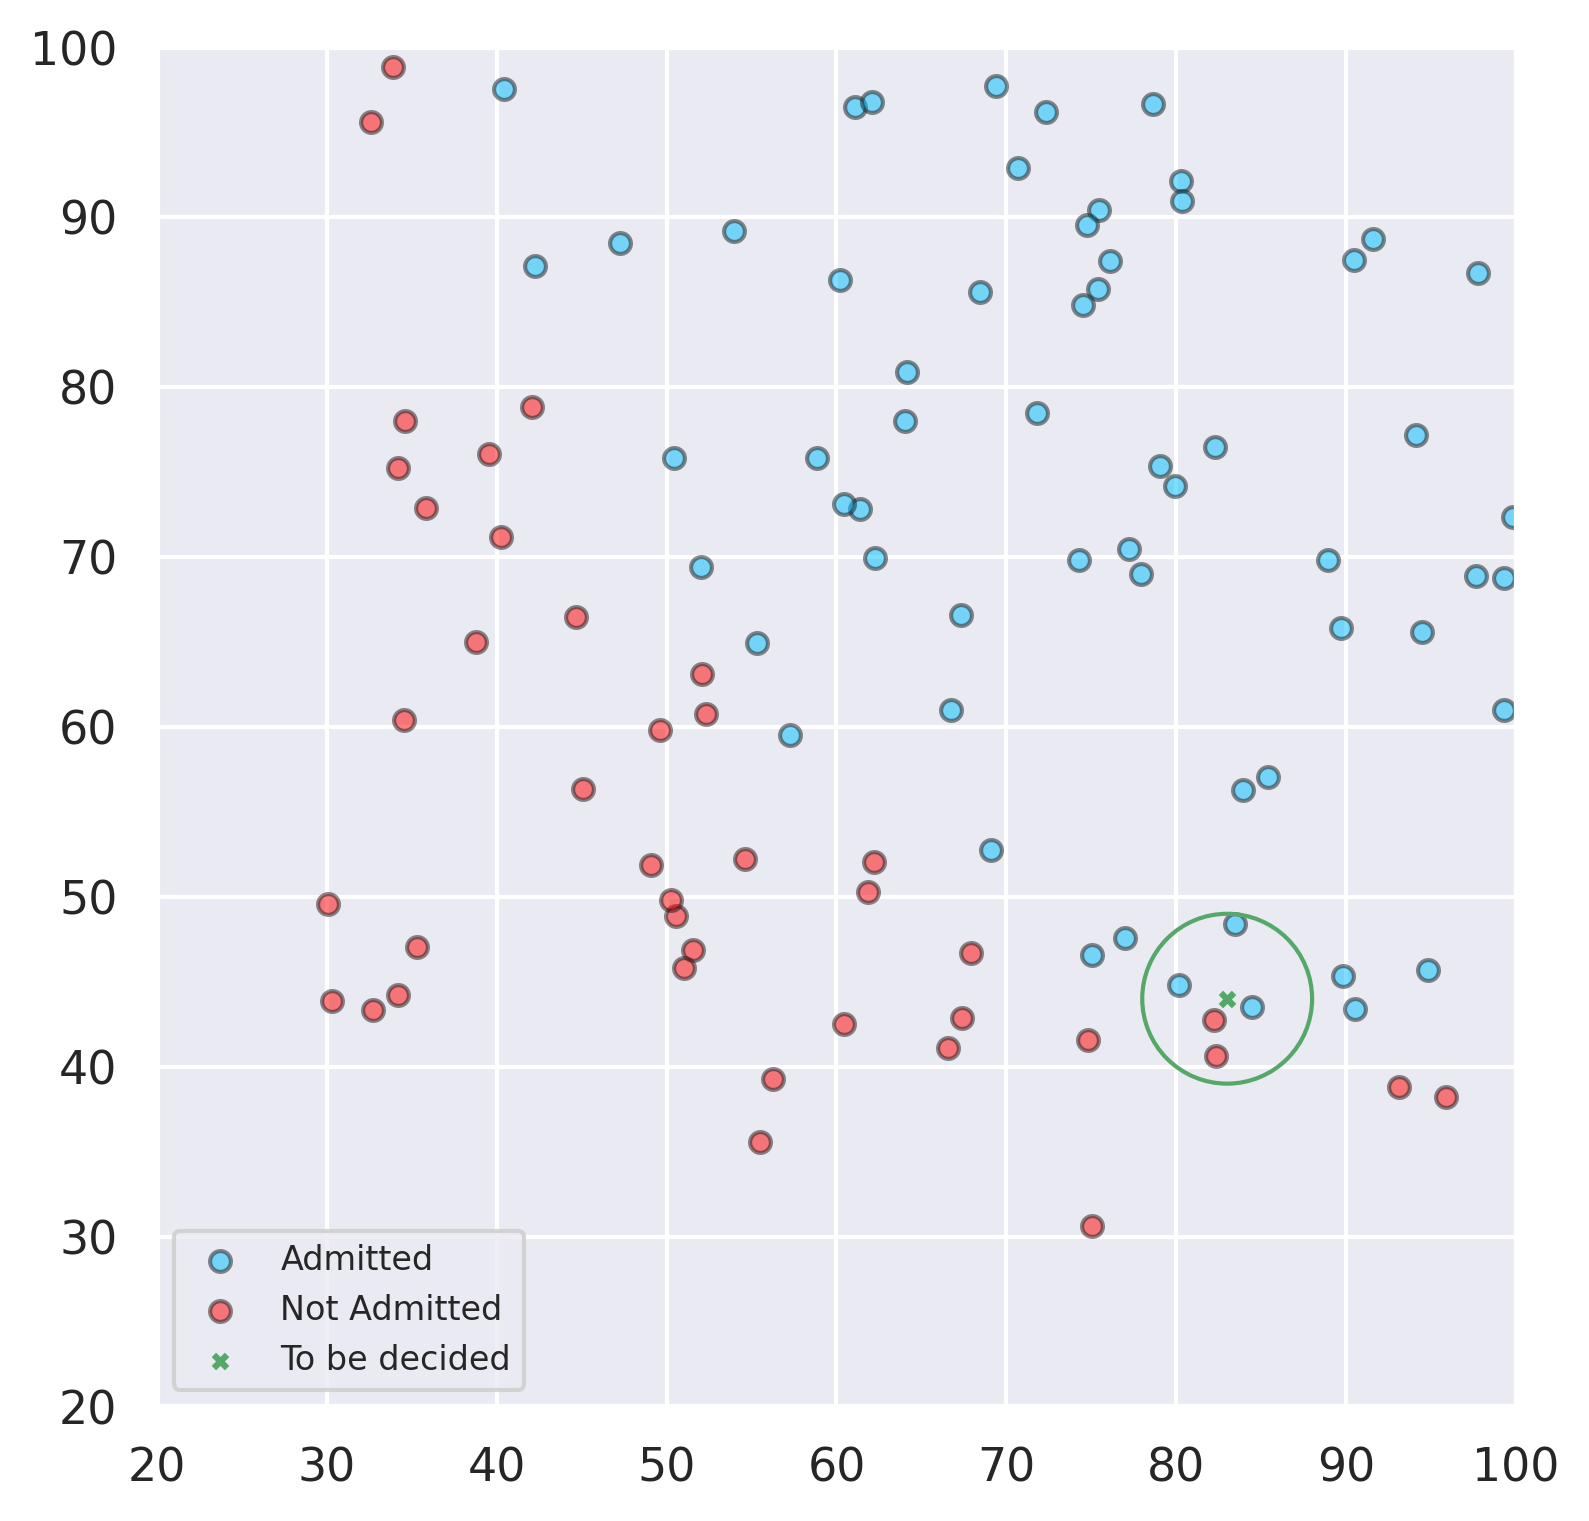

In [14]:
from IPython.core.pylabtools import figsize

fig, ax = plt.subplots(figsize=(6,6))

circle = plt.Circle((83, 44), 5, color='g', fill=False)

ax = plt.gca()
ax.cla() # clear things for fresh plot

# change default range so that new circles will work
ax.set_xlim((20, 100))
ax.set_ylim((20, 100))
# some data
ax.plot(range(11), 'o', color='black')
# key data point that we are encircling
ax.plot((5), (5), 'o', color='y')
ax.add_artist(circle)

ax.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1],color ='deepskyblue', s=25, label='Admitted',ec='k',alpha=0.5)
ax.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1],color='red', s=25, ec='k',alpha=0.5,label='Not Admitted')
ax.scatter(83,44, s=10,marker='x',color='g',label='To be decided')
ax.set_aspect('equal', 'box')
plt.legend(fontsize=8)
#fig.savefig('plotcircles2.png')
plt.show()

In [15]:
n_neighbors = 5
h = .1 # step size in the grid of points
cmap_light = ListedColormap(['bisque', 'lightcyan'])
cmap_bold = ListedColormap(['red', '#00FF00'])

In [16]:
from sklearn import neighbors

Accuracy : 0.95
Accuracy : 1.0


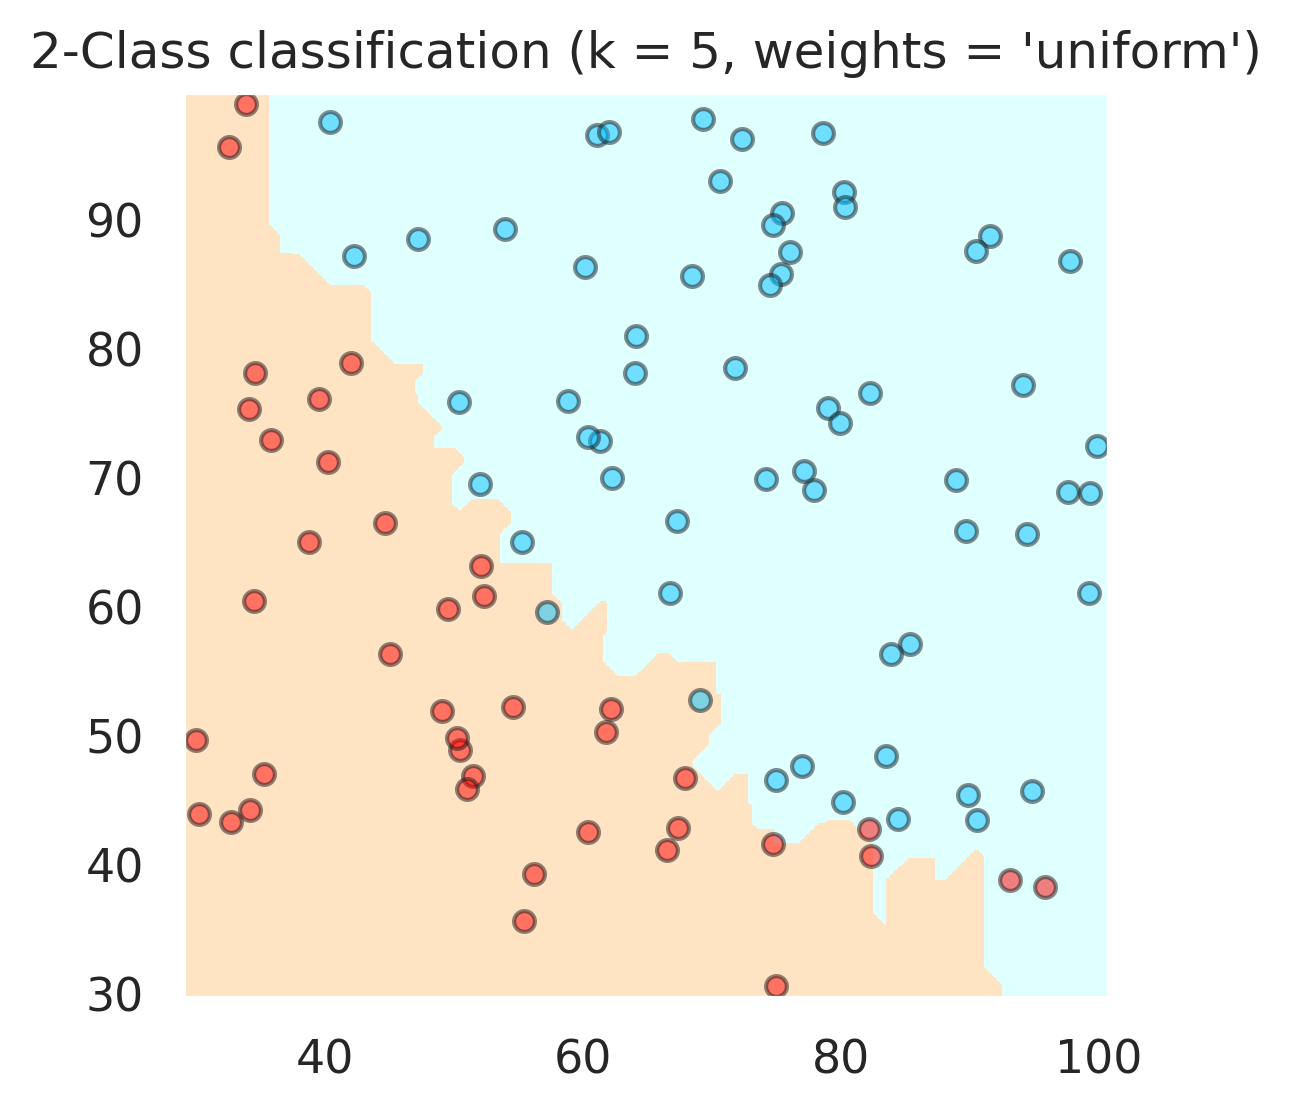

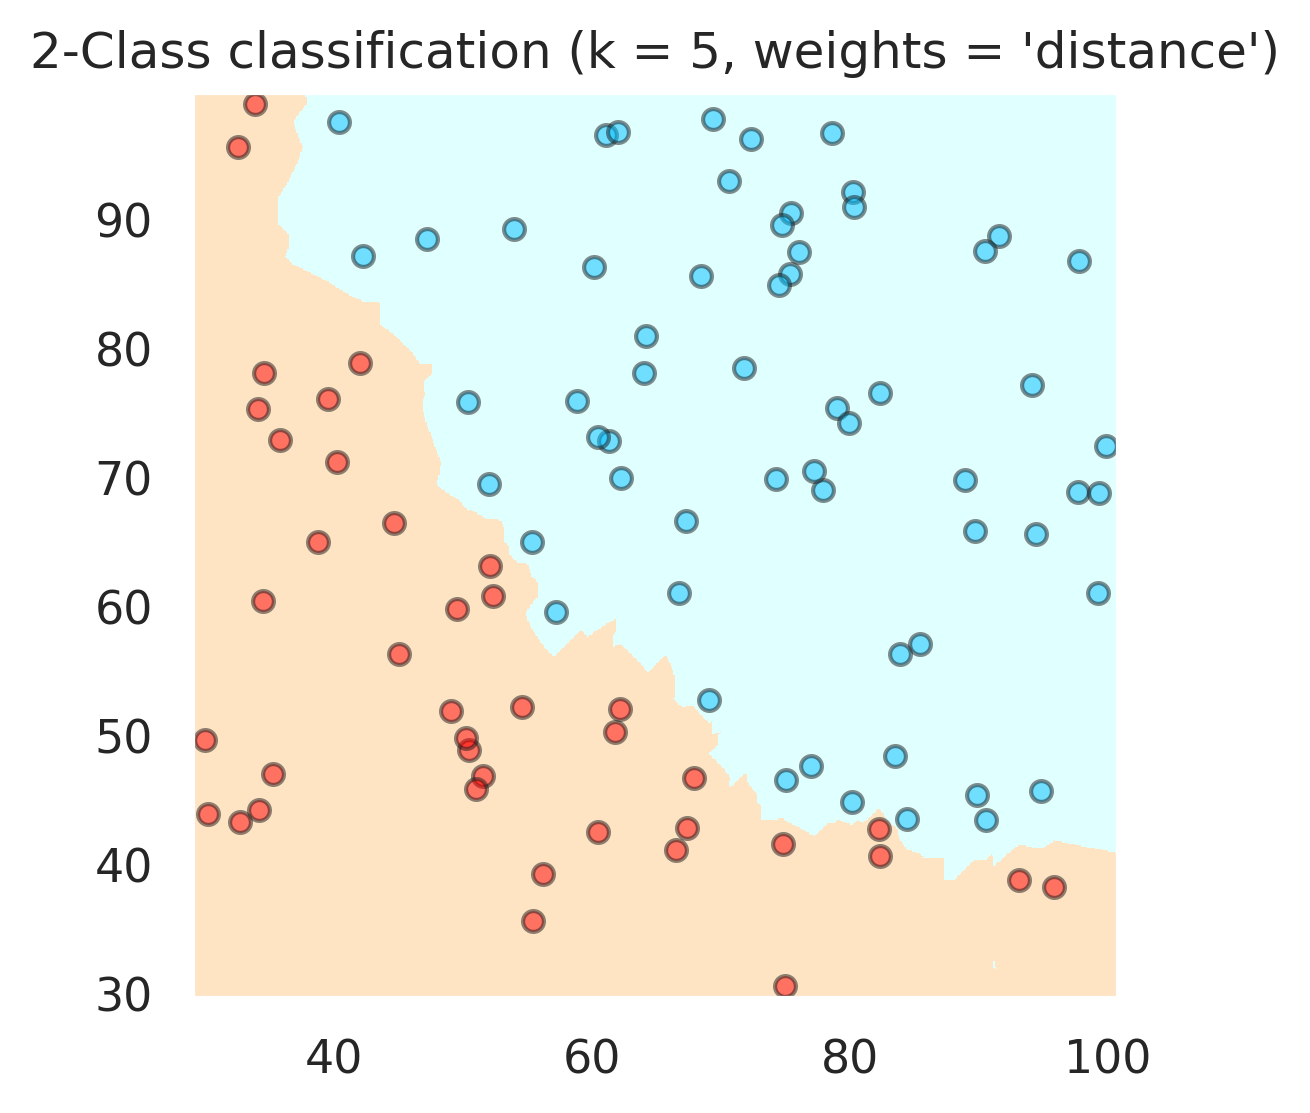

In [17]:
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights,p=1)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = x.values[:, 0].min() - 1, x.values[:, 0].max() + 1
    y_min, y_max = x.values[:, 1].min() - 1, x.values[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the points
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], color ='deepskyblue', s=25, label='Admitted',ec='k',alpha=0.5)
    plt.scatter(not_admitted.iloc[:, 0] ,not_admitted.iloc[:, 1], color ='red', s=25,ec='k',alpha=0.5, label='Not Admitted')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    ax.set_aspect('equal', 'box')
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    print('Accuracy : ' + str(accuracy_score(y,clf.predict(X))))

plt.show()

## <font size=6pt>SVM with Radial Basis Function Kernel (the kernel "trick")

<figure>
<center>
<img src='https://drive.google.com/uc?id=1IuYqAUe7cV8pwxwTUlxQTVUPI2smrcME' 
width='1000px' />
<figcaption>SVM with Radial Basis Function Kernel</figcaption></center>
</figure>

For this we would need at least one landmark point $x_0$. The following is also called a "Gaussian" kernel

$$\Large
(x,y) \rightarrow \left(x,y,z:=e^{-\gamma[(x-x_0)^2+(y-y_0)^2]}\right)
$$

In [18]:
from sklearn import svm

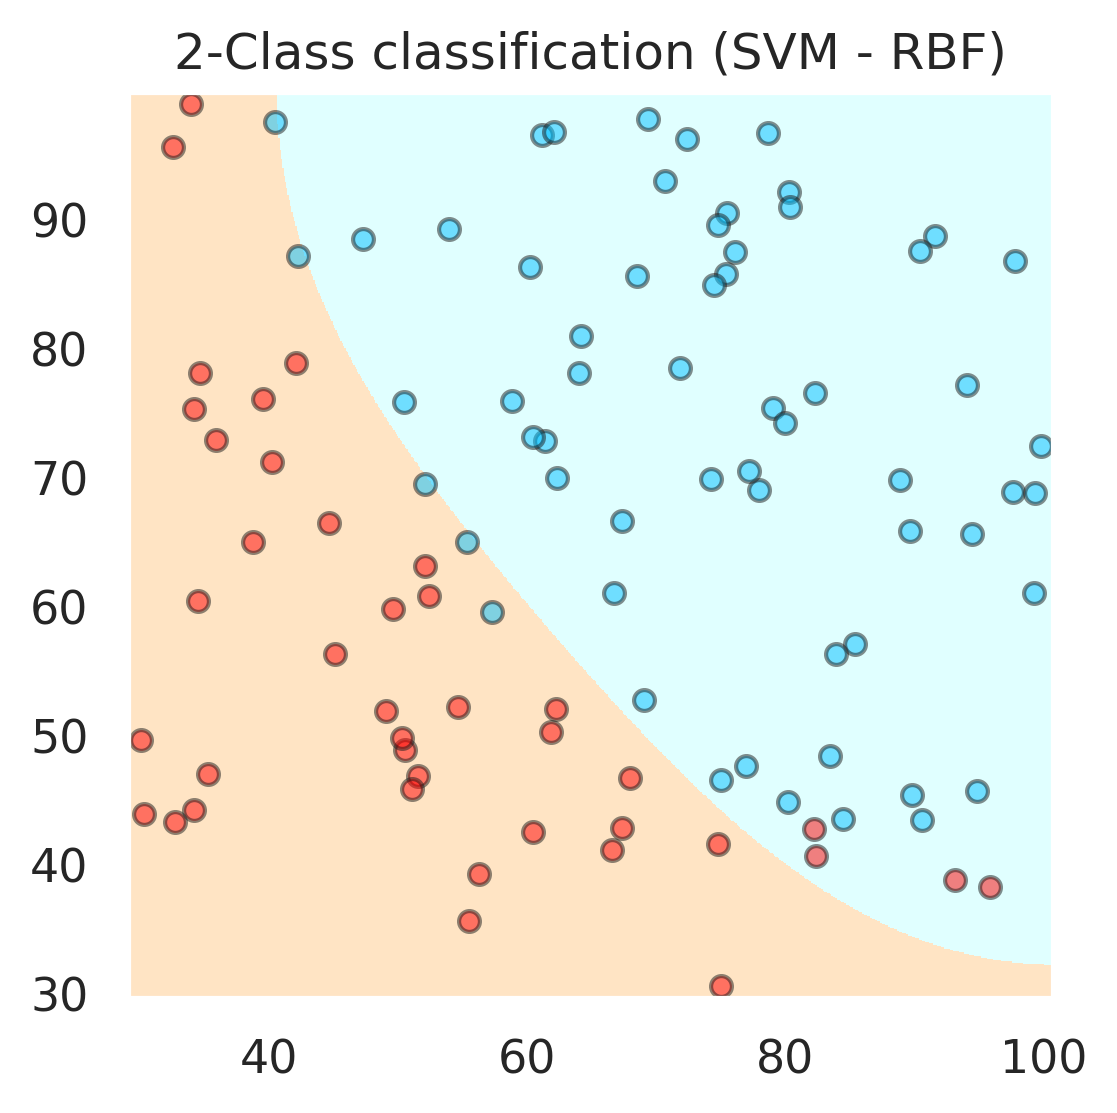

In [19]:
svc = svm.SVC(kernel='rbf', C=1,gamma=0.001,probability=True).fit(X, y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the points
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1],  color ='deepskyblue', s=25, label='Admitted',ec='k',alpha=0.5)
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1],color ='red', s=25,ec='k',alpha=0.5, label='Not Admitted')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.set_aspect('equal', 'box')
plt.title("2-Class classification (SVM - RBF)")

plt.show()

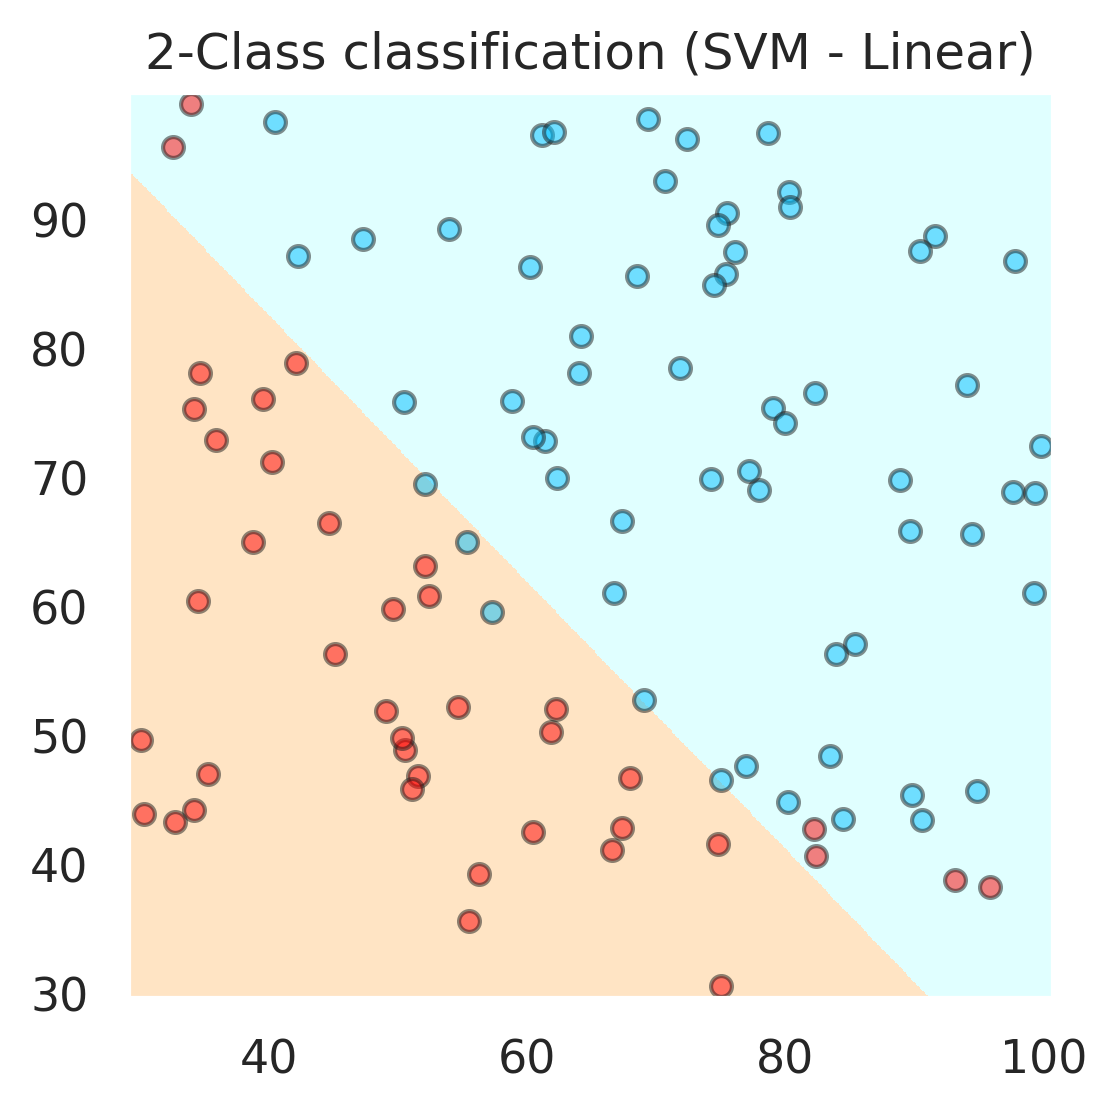

In [26]:
svc = svm.SVC(kernel='linear', C=1,gamma='auto',probability=True).fit(X, y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the points
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1],  color ='deepskyblue', s=25, label='Admitted',ec='k',alpha=0.5)
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1],color ='red', s=25,ec='k',alpha=0.5, label='Not Admitted')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.set_aspect('equal', 'box')
plt.title("2-Class classification (SVM - Linear)")

plt.show()

In [21]:
accuracy_score(y,svc.predict(X))

0.91

In [22]:
svc.predict_proba([[70,67]])

array([[0.10848745, 0.89151255]])

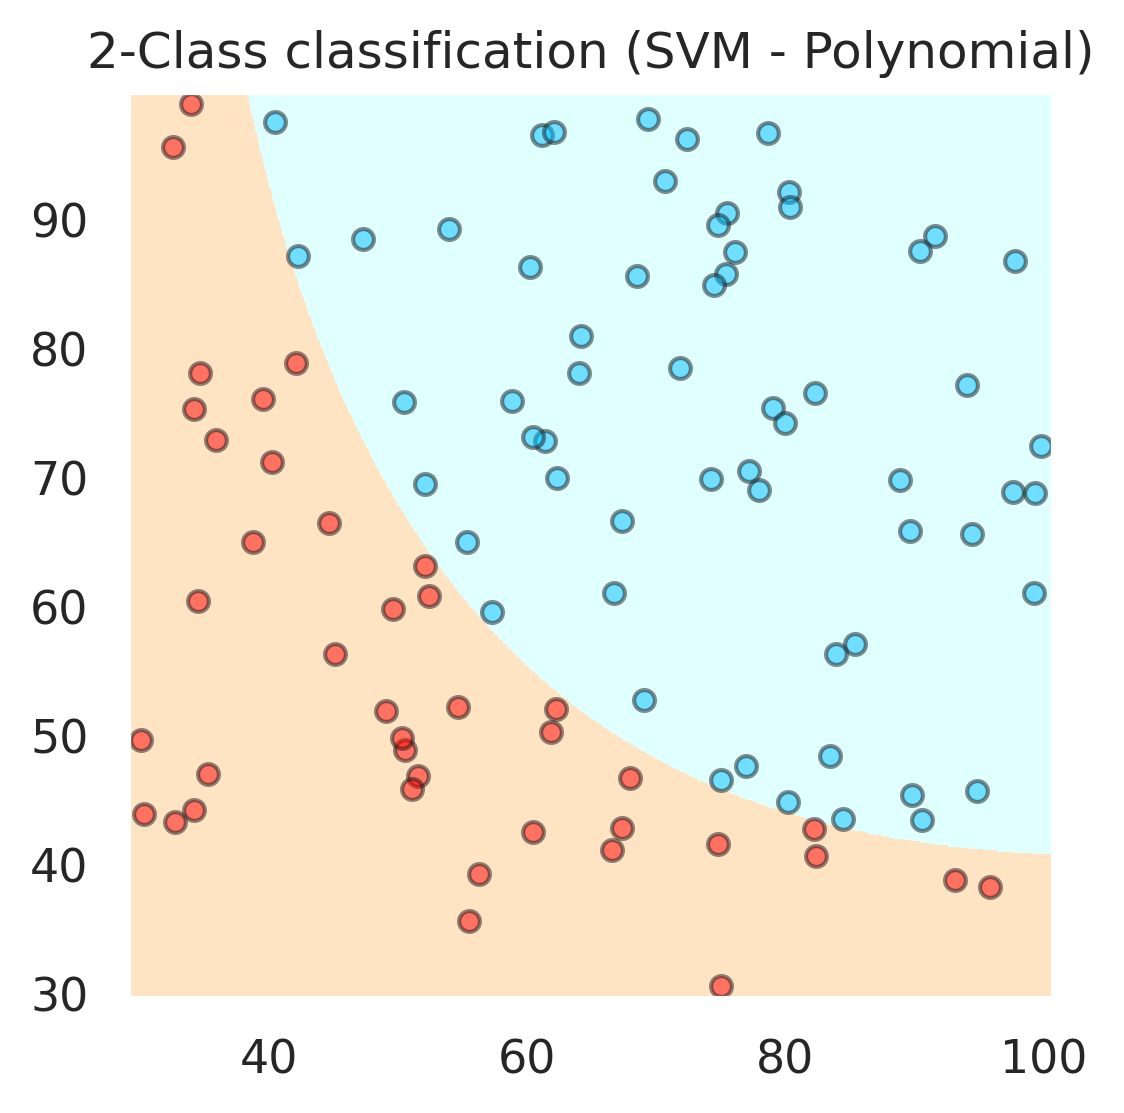

In [27]:
svc = svm.SVC(kernel='poly', C=1,gamma='auto',probability=True,degree=3).fit(X, y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the points
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1],  color ='deepskyblue', s=25, label='Admitted',ec='k',alpha=0.5)
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1],color ='red', s=25,ec='k',alpha=0.5, label='Not Admitted')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.set_aspect('equal', 'box')
plt.title("2-Class classification (SVM - Polynomial)")

plt.show()

In [24]:
accuracy_score(y,svc.predict(x))

1.0

In [25]:
svc.predict_proba([[43,81]])

array([[0.59723063, 0.40276937]])

# Decision Tree classifier

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=123, max_depth=4)
model.fit(x, y);
predicted_classes = model.predict(x)
accuracy = accuracy_score(y,predicted_classes)
print(accuracy)

1.0


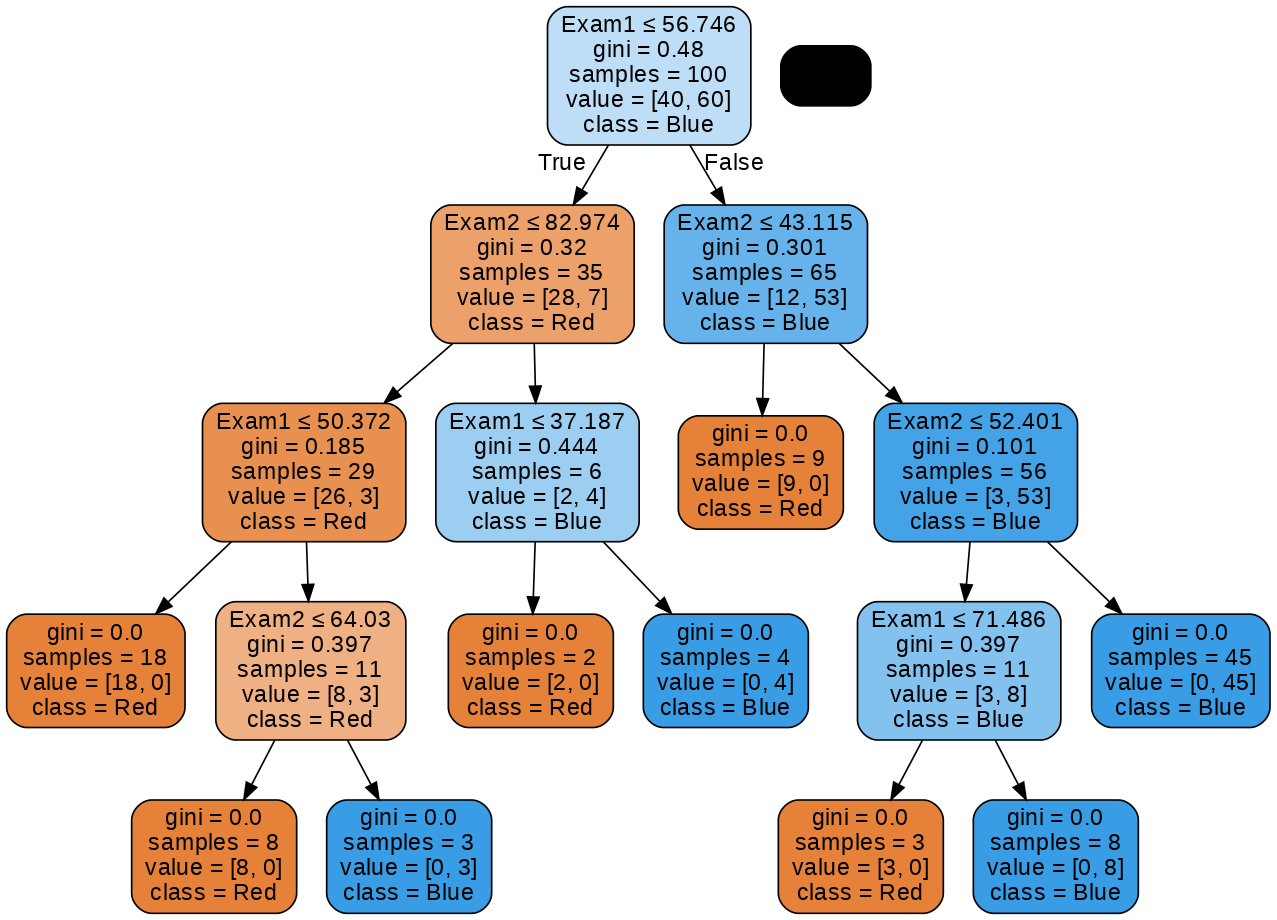

In [ ]:
import pydot
from IPython.display import Image


feats = ['Exam1','Exam2']
spc = ['Red','Blue']
def ShowTree(classifier, features, classes):
    dot_data = tree.export_graphviz(model, out_file=None, filled=True, rounded=True,
                special_characters=True, feature_names=features, class_names=classes)
    (g, ) = pydot.graph_from_dot_data(dot_data)
    g.set_dpi('120')
    g.write_png('tree.png')
    return Image(g.create_png())

ShowTree(model, feats, spc)

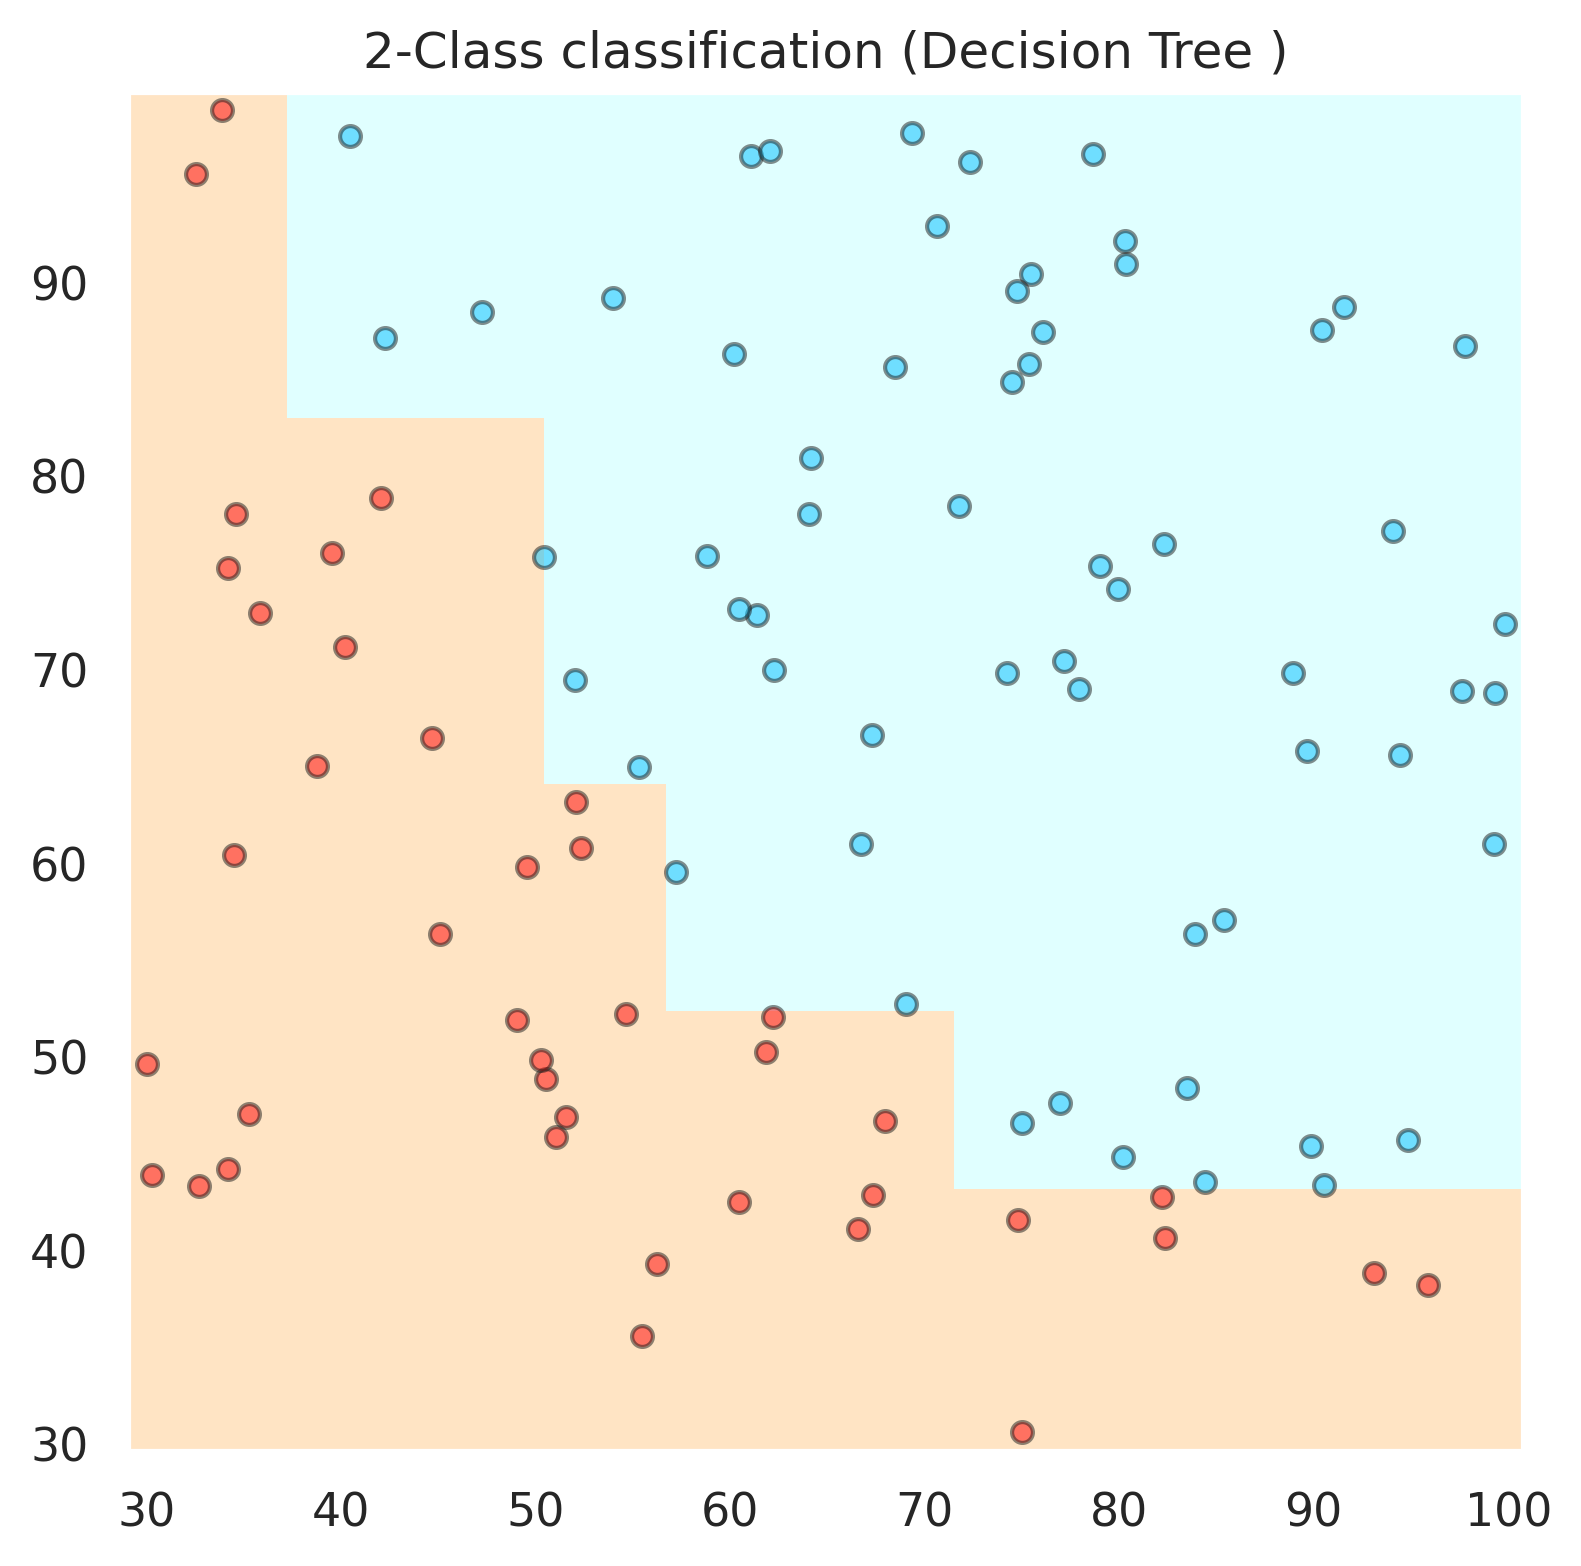

In [ ]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(6,6))
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the points
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1],  color ='deepskyblue', s=25, label='Admitted',ec='k',alpha=0.5)
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1],color ='red', s=25,ec='k',alpha=0.5, label='Not Admitted')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (Decision Tree )")

plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1234, max_depth=5, n_estimators = 1000)
model.fit(x, y);
predicted_classes = model.predict(X)
accuracy = accuracy_score(y,predicted_classes)
print(accuracy)

1.0


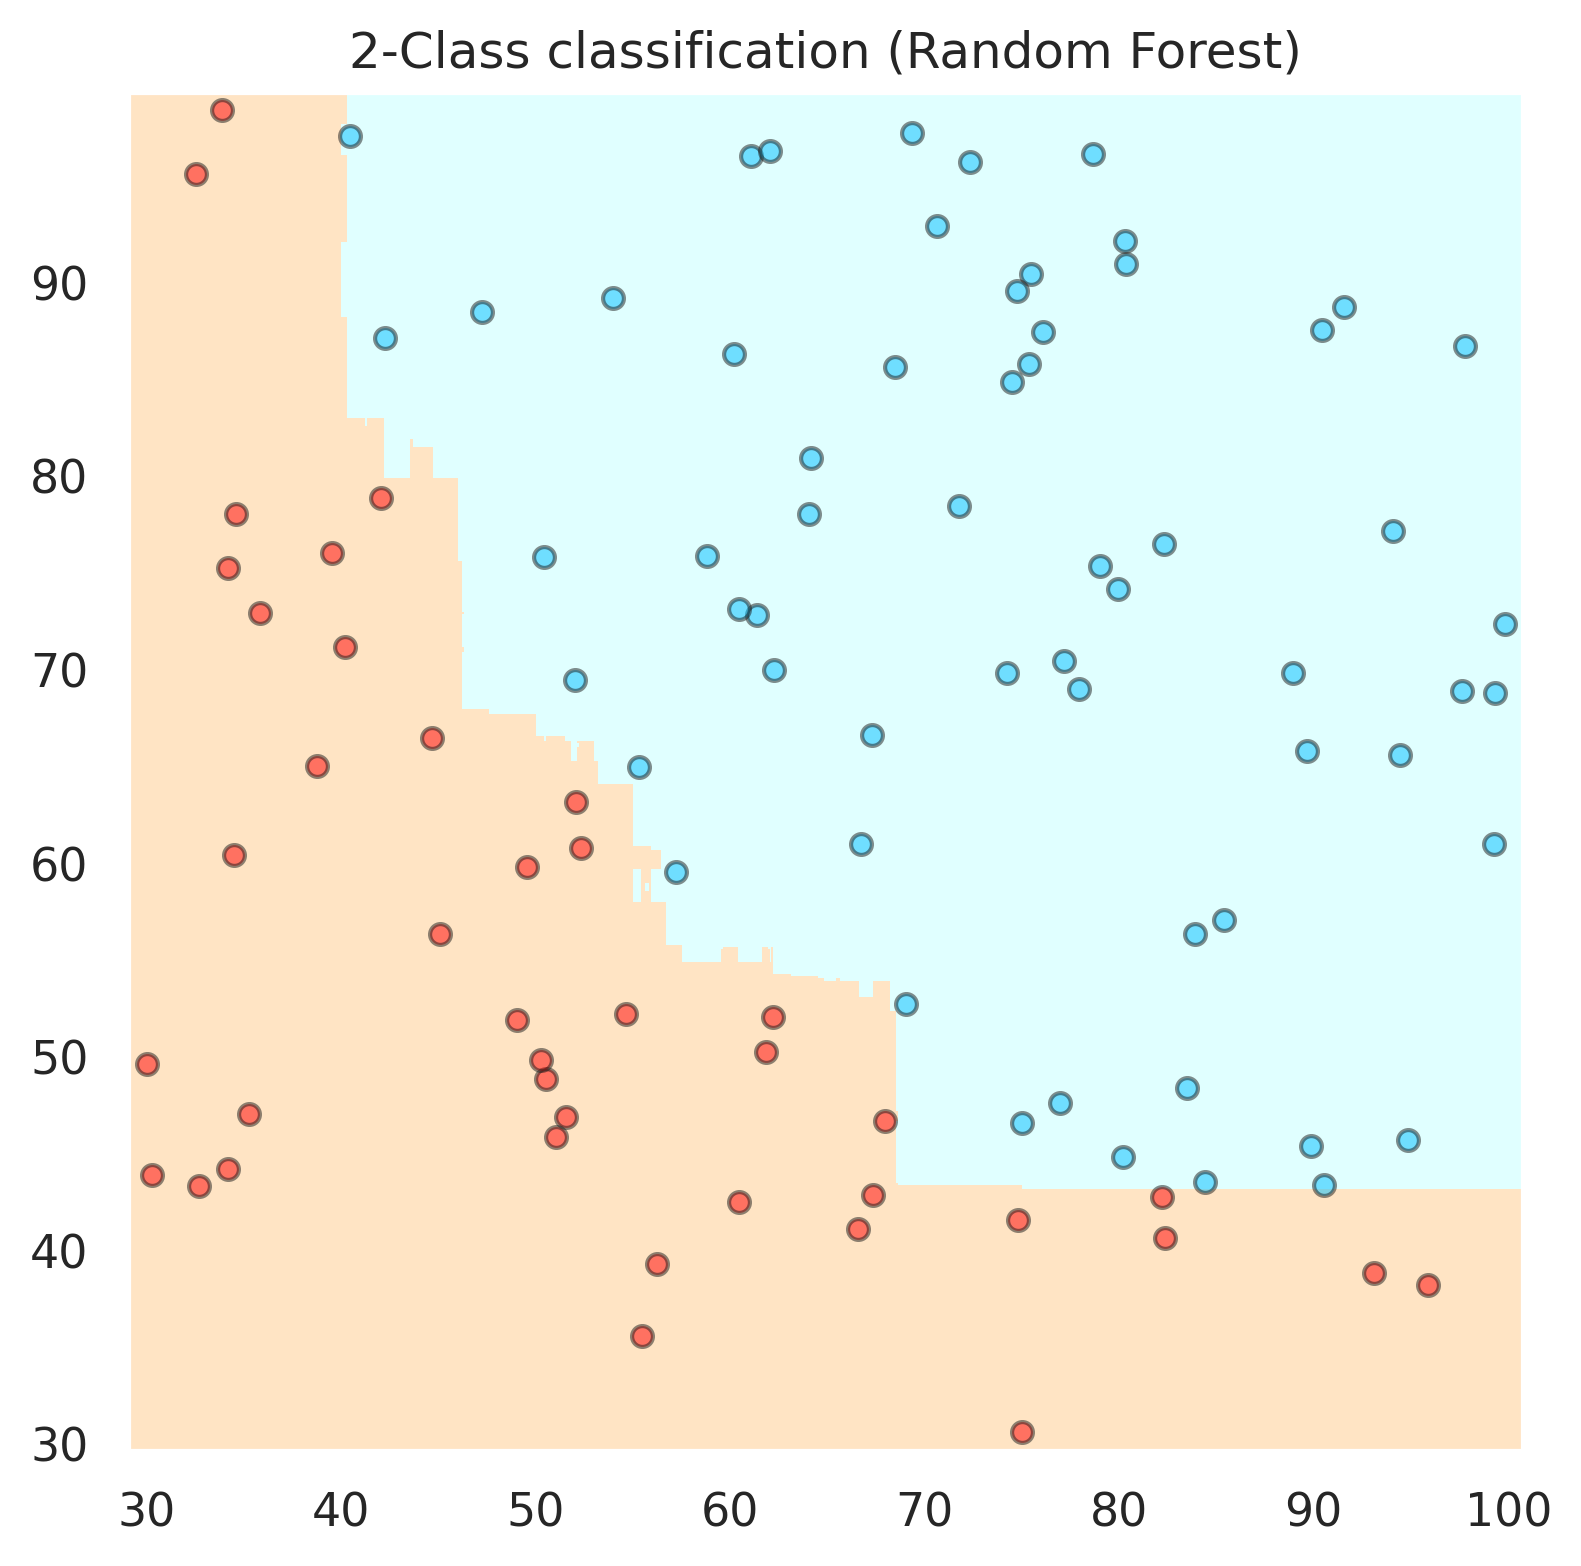

In [ ]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(6,6))
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the points
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1],  color ='deepskyblue', s=25, label='Admitted',ec='k',alpha=0.5)
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1],color ='red', s=25,ec='k',alpha=0.5, label='Not Admitted')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (Random Forest)")

plt.show()